# TP6 - Clustering : Recommandations de livres

Dans cette séance on s'intéresse au dataset issue de [wonderbk.com](wonderbk.com) un site de vente de livre en ligne. Nous allons réaliser des clusters de livre pour constuire un système de recommandation de livre.
Les informations dont on dispose sont :
* **Title** : titre du livre
* **Authors** : Auteur du livre
* **Description** : Description du livre
* **Category** : Catégorie ou genre du livre
* **Publisher** : Maison d'édition du livre
* **Price Starting With ($)** : Prix initial du livre
* **Publish Date** : Date de la publication du livre

Commençons par importer les données.

In [33]:
import numpy as np
import pandas as pd

df = pd.read_csv("BooksDataset.csv")
df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32


## Nettoyage

On note que le dataset n'est pas exploitable en l'état, nous allons devoir faire un travail de mise en qualité avant de pouvoir construire le système de recommandation. Commençons par la colonne *Price*.

**Consigne** : Nettoyer la colonne *Price* pour la rendre numérique.

In [3]:
# Remove the 'Price Starting at $' part and convert to float
df['Price'] = df['Price'].str.extract(r'(\d+\.\d+)').astype(float)
print(df['Price'].head())

0    8.79
1    4.99
2    4.99
3    4.99
4    5.32
Name: Price, dtype: float64


**Consigne** : Constuire la colonne *Publish Year* qui correspond à l'année de publication.

In [34]:
df['Publish Year'] = df['Publish Date'].str.extract(r'(\d{4})').astype(int)
print(df['Publish Year'].head())

0    1993
1    1981
2    1983
3    1991
4    1997
Name: Publish Year, dtype: int64


**Consigne** : Afficher la répartition du nombre de livre publié par an.

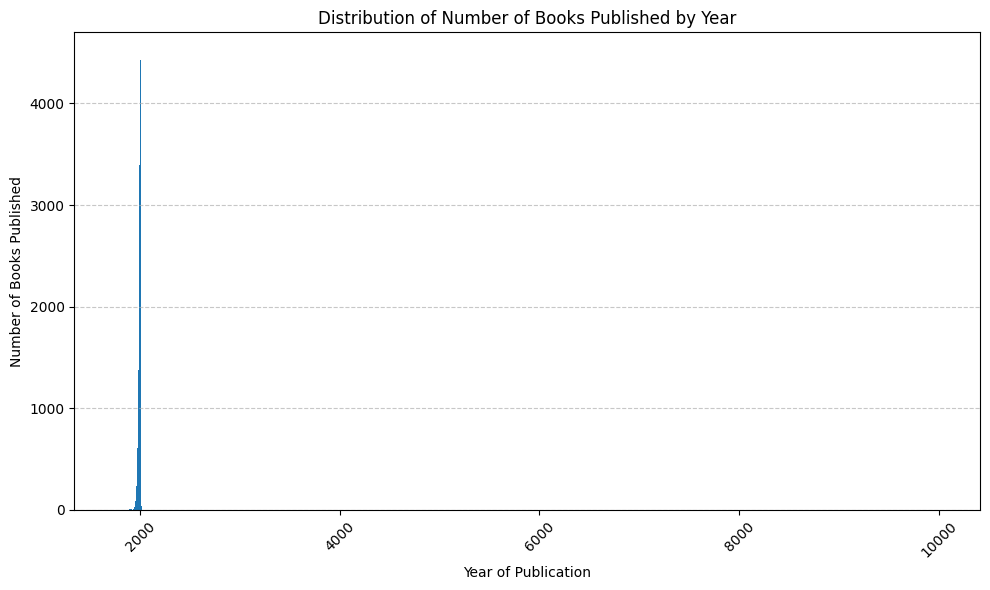

In [35]:
import matplotlib.pyplot as plt

# Counting the number of books published each year
publish_year_counts = df['Publish Year'].value_counts().sort_index()

# Plotting the distribution of books published per year
plt.figure(figsize=(10, 6))
plt.bar(publish_year_counts.index, publish_year_counts.values)
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books Published')
plt.title('Distribution of Number of Books Published by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Consigne** : Ne sélectionner que les livres publiés entre 1950 et 2024.

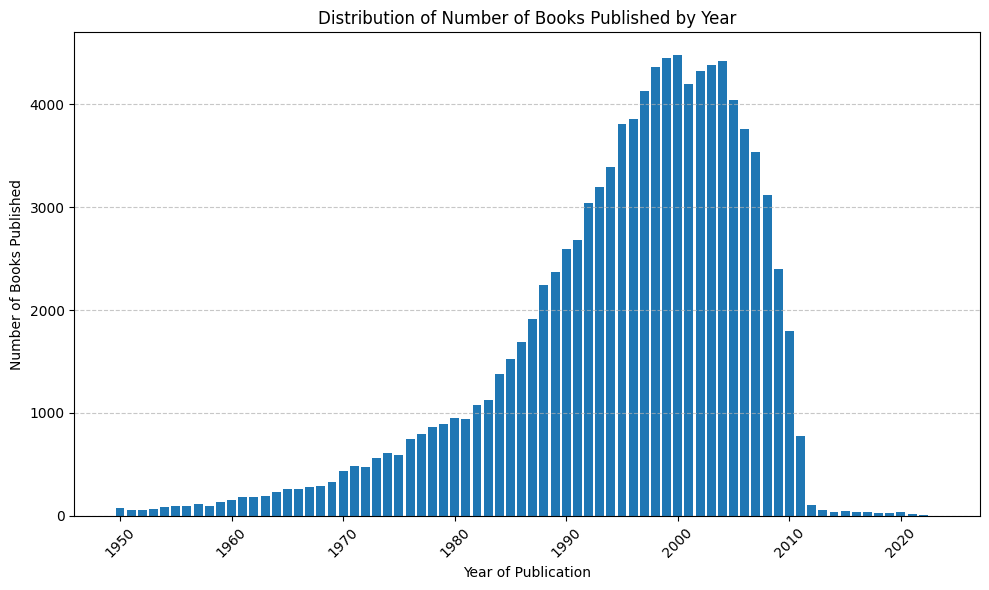

In [36]:
df = df[(df['Publish Year'] >= 1950) & (df['Publish Year'] <= 2024)]

# Counting the number of books published each year
publish_year_counts = df['Publish Year'].value_counts().sort_index()

# Plotting the distribution of books published per year
plt.figure(figsize=(10, 6))
plt.bar(publish_year_counts.index, publish_year_counts.values)
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books Published')
plt.title('Distribution of Number of Books Published by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Il semblerait que la colonne *Authors* commence systématiquement par *By_*. 

**Consigne** : Vérifier si c'est effectivement le cas, et nettoyer la colonne en conséquence.

In [37]:
df['Authors'] = df['Authors'].str.replace('^By ', '', regex=True)

df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price,Publish Year
0,Goat Brothers,"Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79,1993
1,The Missing Person,"Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99,1981
2,Don't Eat Your Heart Out Cookbook,"Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99,1983
3,When Your Corporate Umbrella Begins to Leak: A...,"Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99,1991
4,Amy Spangler's Breastfeeding : A Parent's Guide,"Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32,1997


On s'intéresse avant de continuer aux valeurs manquantes. Pour construire notre système de recommandation, on souhaite en avoir aucune.

**Consigne** : Après avoir identifier avec la méthode [`isna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) les colonnes contenant des valeurs manquantes, les supprimer avec la méthode [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).


In [38]:
missing_values = df.isnull().sum()

print(missing_values)

df = df.dropna()

df.head()

Title               0
Authors             0
Description     32035
Category        25397
Publisher           8
Publish Date        0
Price               0
Publish Year        0
dtype: int64


,Title,Authors,Description,Category,Publisher,Publish Date,Price,Publish Year
7,Journey Through Heartsongs,"Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,"Saturday, September 1, 2001",Price Starting at $19.96,2001
8,In Search of Melancholy Baby,"Aksyonov, Vassily, Heim, Michael Henry, and Bo...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,"Monday, June 1, 1987",Price Starting at $4.99,1987
10,The Dieter's Guide to Weight Loss During Sex,"Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,"Sunday, January 1, 1978",Price Starting at $4.99,1978
11,Germs : Biological Weapons and America's Secre...,"Miller, Judith, Engelberg, Stephen, and Broad,...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,"Monday, October 1, 2001",Price Starting at $4.99,2001
13,The Good Book: Reading the Bible with Mind and...,"Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,"Friday, May 1, 1998",Price Starting at $5.29,1998


On souhaite pouvoir exploiter la colonne *Category*. Pour le faire, nous allons faire un one hot encoding, mais nous devons le faire sur chaque categorie. Commençons par calculer la fréquence d'apparition de chaque catégorie.

In [39]:
categories = {}

for row in df['Category']:
    if isinstance(row, str):
        for category in row.split(" , "):
            category = category.strip()
            if category in categories:
                categories[category] += 1
            else:
                categories[category] = 1

categories = dict(sorted(categories.items(), key=lambda x: x[1], reverse=True))
print(categories)


{'General': 25683, 'Fiction': 17718, 'Juvenile Fiction': 6409, 'Religion': 3637, 'Romance': 3491, 'Cooking': 2878, 'Juvenile Nonfiction': 2665, 'History': 2583, 'Business & Economics': 2543, 'Historical': 2356, 'Thrillers': 2298, 'Biography & Autobiography': 2287, 'Mystery & Detective': 2273, 'Political Science': 1849, 'Literary': 1763, 'Reference': 1760, 'Health & Fitness': 1585, 'Young Adult Fiction': 1544, 'Social Science': 1511, 'United States': 1436, 'Suspense': 1318, 'Family & Relationships': 1279, 'Sports & Recreation': 1261, 'Travel': 1188, 'Contemporary': 1144, 'Self-help': 1085, 'Humor': 1038, 'Fantasy': 990, 'Science Fiction': 925, 'Readers': 891, 'Science': 850, 'Animals': 847, 'Social Themes': 843, 'Computers': 836, 'House & Home': 804, 'Psychology': 792, 'Crafts & Hobbies': 695, 'Parenting': 656, 'Pets': 633, 'Religious': 633, 'Christian Life': 625, 'Medical': 593, 'Gardening': 584, 'Christian': 551, 'Education': 541, 'Art': 534, 'Military': 523, 'Beginner': 517, 'Family'

**Consigne** : Sélectionner les 20 premiers types les plus fréquent, puis créer autant de colonne valant 1 si le livre correspond à la catégorie, 0 sinon.

In [40]:
top_categories = list(categories.keys())[:20]

for category in top_categories:
    df[category] = df['Category'].apply(lambda x: 1 if category in x.split(" , ") else 0)

df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price,Publish Year,General,Fiction,...,Thrillers,Biography & Autobiography,Mystery & Detective,Political Science,Literary,Reference,Health & Fitness,Young Adult Fiction,Social Science,United States
7,Journey Through Heartsongs,"Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,"Saturday, September 1, 2001",Price Starting at $19.96,2001,1,0,...,0,0,0,0,0,0,0,0,0,0
8,In Search of Melancholy Baby,"Aksyonov, Vassily, Heim, Michael Henry, and Bo...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,"Monday, June 1, 1987",Price Starting at $4.99,1987,1,0,...,0,0,0,0,0,0,0,0,0,0
10,The Dieter's Guide to Weight Loss During Sex,"Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,"Sunday, January 1, 1978",Price Starting at $4.99,1978,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Germs : Biological Weapons and America's Secre...,"Miller, Judith, Engelberg, Stephen, and Broad,...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,"Monday, October 1, 2001",Price Starting at $4.99,2001,0,0,...,0,0,0,0,0,0,0,0,0,0
13,The Good Book: Reading the Bible with Mind and...,"Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,"Friday, May 1, 1998",Price Starting at $5.29,1998,1,0,...,0,0,0,0,0,0,0,0,0,0


## Exploitation des descriptions

Beaucoup d'informations sont comprises dans ces lignes, et nous devons être capable de le transformer en nombre. Commençons par de l'analyse de sentiments. Il existe plusieurs librairies permettant de faire cela, la première est [TextBlob](https://textblob.readthedocs.io/en/dev/) :

In [41]:
from textblob import TextBlob

texts = ["Theo always give great lecture", "Theo is reallty not a good lecturer", "Theo is OK at his job"]
for text in texts:
    blob = TextBlob(text)
    print(f"Analyse de \"{text}\" : {blob.sentiment}")

Analyse de "Theo always give great lecture" : Sentiment(polarity=0.8, subjectivity=0.75)
Analyse de "Theo is reallty not a good lecturer" : Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)
Analyse de "Theo is OK at his job" : Sentiment(polarity=0.5, subjectivity=0.5)


Une autre est [VADER](https://vadersentiment.readthedocs.io/en/latest/) :

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
for text in texts:
    scores = analyzer.polarity_scores(text)
    print(f"Analyse de \"{text}\" : {scores}")

Analyse de "Theo always give great lecture" : {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}
Analyse de "Theo is reallty not a good lecturer" : {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3412}
Analyse de "Theo is OK at his job" : {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.4466}


On souhaite intégrer ces informations dans notre datasets.

**Consigne** : Créer une colonne *Description_sentiment_Blob* qui correspond à la valeur *polarity* calculée par TextBlob et une autre colonne *Description_sentiment_VADER* qui correspond à la valeur *compound* calculée par VADER. Faire de même avec la colonne *Title*.

In [43]:
df['Description Sentiment Blob'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Description Sentiment Vader'] = df['Description'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Title Sentiment Blob'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Title Sentiment Vader'] = df['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price,Publish Year,General,Fiction,...,Literary,Reference,Health & Fitness,Young Adult Fiction,Social Science,United States,Description Sentiment Blob,Description Sentiment Vader,Title Sentiment Blob,Title Sentiment Vader
7,Journey Through Heartsongs,"Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,"Saturday, September 1, 2001",Price Starting at $19.96,2001,1,0,...,0,0,0,0,0,0,0.000000,0.8176,0.0,0.0000
8,In Search of Melancholy Baby,"Aksyonov, Vassily, Heim, Michael Henry, and Bo...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,"Monday, June 1, 1987",Price Starting at $4.99,1987,1,0,...,0,0,0,0,0,0,0.020000,0.8126,0.0,-0.4404
10,The Dieter's Guide to Weight Loss During Sex,"Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,"Sunday, January 1, 1978",Price Starting at $4.99,1978,0,0,...,0,0,0,0,0,0,0.186147,0.8020,0.0,-0.3182
11,Germs : Biological Weapons and America's Secre...,"Miller, Judith, Engelberg, Stephen, and Broad,...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,"Monday, October 1, 2001",Price Starting at $4.99,2001,0,0,...,0,0,0,0,0,0,-0.043766,-0.9975,-0.4,-0.7783
13,The Good Book: Reading the Bible with Mind and...,"Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,"Friday, May 1, 1998",Price Starting at $5.29,1998,1,0,...,0,0,0,0,0,0,0.134722,-0.2732,0.7,0.7964


On souhaite étudier la distribution et la corrélation entre les scores, pour le titre et la description des livres.

**Consigne** : Afficher sur un même graphique la distribution des scores pour la description entre TextBlob et VADER.

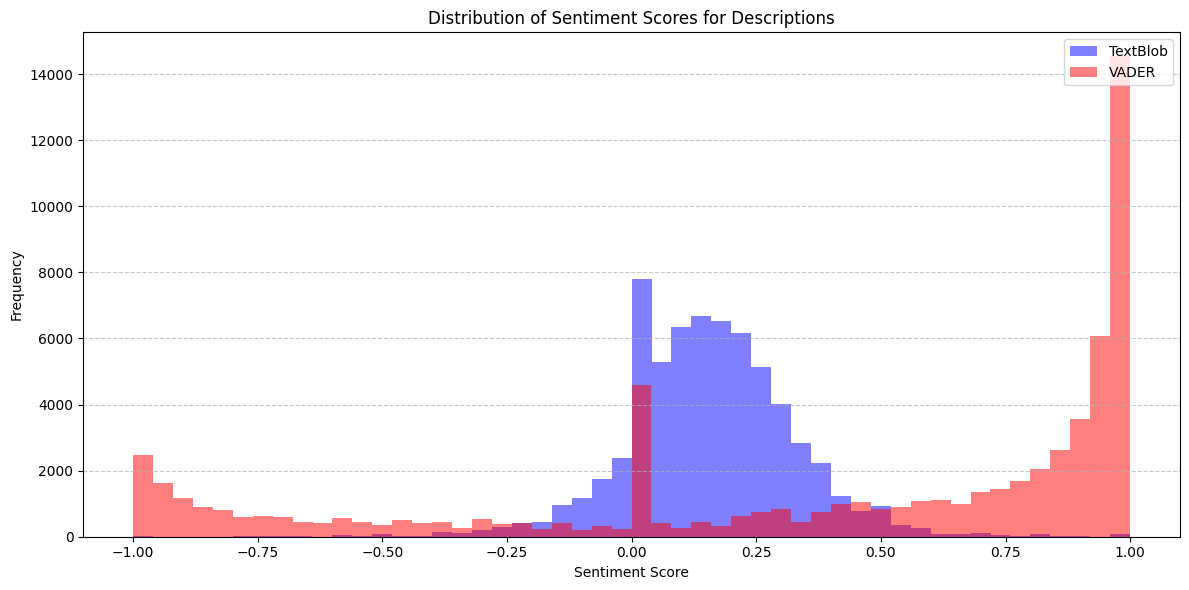

In [44]:
plt.figure(figsize=(12, 6))

# Plotting the distribution of TextBlob sentiment scores for descriptions
plt.hist(df['Description Sentiment Blob'], bins=50, alpha=0.5, label='TextBlob', color='blue')

# Plotting the distribution of VADER sentiment scores for descriptions
plt.hist(df['Description Sentiment Vader'], bins=50, alpha=0.5, label='VADER', color='red')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for Descriptions')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Consigne** : Afficher un scatter plot entre les score de TextBlob et de VADER pour les deux colonnes concernées.

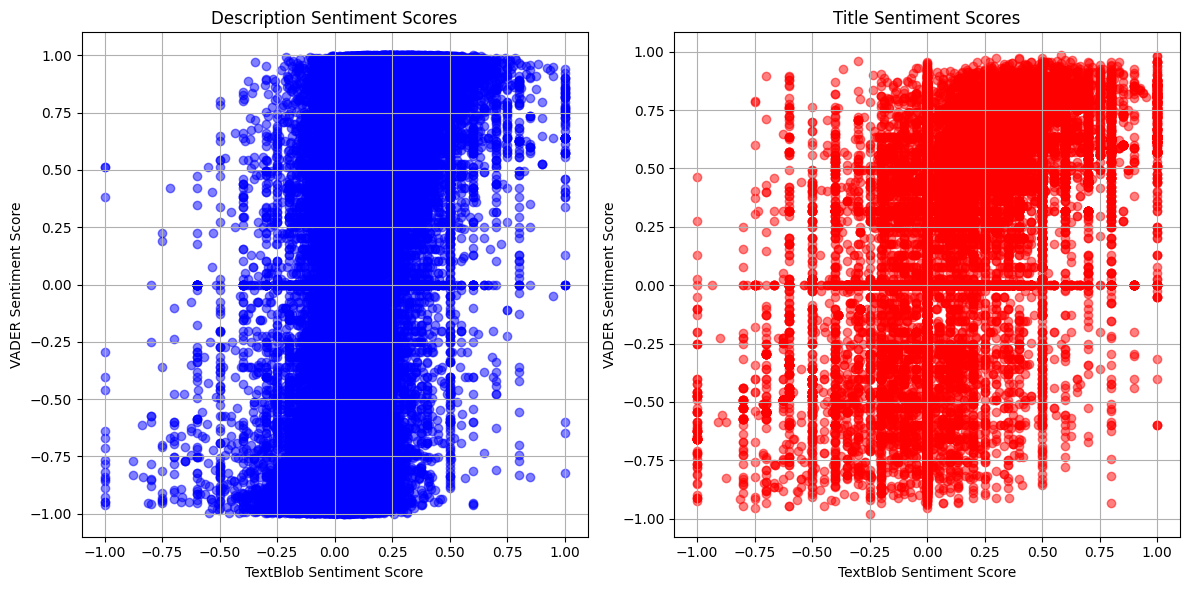

In [45]:
plt.figure(figsize=(12, 6))

# Scatter plot for Description sentiment scores
plt.subplot(1, 2, 1)
plt.scatter(df['Description Sentiment Blob'], df['Description Sentiment Vader'], alpha=0.5, color='blue')
plt.xlabel('TextBlob Sentiment Score')
plt.ylabel('VADER Sentiment Score')
plt.title('Description Sentiment Scores')
plt.grid(True)

# Scatter plot for Title sentiment scores
plt.subplot(1, 2, 2)
plt.scatter(df['Title Sentiment Blob'], df['Title Sentiment Vader'], alpha=0.5, color='red')
plt.xlabel('TextBlob Sentiment Score')
plt.ylabel('VADER Sentiment Score')
plt.title('Title Sentiment Scores')
plt.grid(True)

plt.tight_layout()
plt.show()

## Calcul des clusters

Nous avons maintenant accès à un dataset permettant d'exploiter du Machine Learning non supervisé. Puisque les résolutions des problèmes que les algorithmes vont résoudre peuvent exploiter des variantes d'une descente de gradient, nous devons préparer en conséquence la matrice.

**Consigne** : A partir du dataset *df*, ne conserver que les colonnes numériques puis avec la classe [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) standardiser les données.

In [46]:
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(numerical_df)

print(X)

[[ 0.28130355  1.24023264  0.         ...  0.64621867 -0.29472342
  -0.31432565]
 [-1.43802445  1.24023264  0.         ...  0.63871423 -0.29472342
  -1.59977725]
 [-2.54330673 -0.80630034  0.         ...  0.62280482 -0.29472342
  -1.24309654]
 ...
 [-0.08712388  1.24023264  0.         ...  0.90602239 -0.29472342
   1.61122481]
 [-0.08712388 -0.80630034  0.         ...  0.60509434 -0.29472342
  -0.31432565]
 [-0.94678788  1.24023264  0.         ...  0.16038122  0.75770042
  -0.31432565]]


**Consigne** : A l'aide de la classe [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) calculer les clusters et les stocker dans une variable *labels*. On prendra *n_clusters=5*. Finalement, afficher le nombre d'observations dans chaque cluster.

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(X)

# Count the number of observations in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print(cluster_counts)

{np.int32(0): np.int64(16897), np.int32(1): np.int64(26614), np.int32(2): np.int64(16566), np.int32(3): np.int64(540), np.int32(4): np.int64(4571)}


**Consigne** : Calculer la performance du clustering avec la fonction [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [49]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.14700501925614484


On souhaite a présent avoir un peu d'explicabilité pour ces clusters. Pour le faire, nous allons reporter les labels appris dans le dataset initial.

**Consigne** : Construire un dataset *data* à partir de *df*, et y ajouter le vecteur *labels*. On supprimera des catégories OHE pour la lisibilité.

In [50]:
# Create a copy of the original dataframe
data = df.copy()

# Add the cluster labels to the dataframe
data['Cluster'] = labels

# Drop the one-hot encoded category columns for better readability
data = data.drop(columns=top_categories)

# Display the first few rows of the updated dataframe
data.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price,Publish Year,Description Sentiment Blob,Description Sentiment Vader,Title Sentiment Blob,Title Sentiment Vader,Cluster
7,Journey Through Heartsongs,"Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,"Saturday, September 1, 2001",Price Starting at $19.96,2001,0.000000,0.8176,0.0,0.0000,2
8,In Search of Melancholy Baby,"Aksyonov, Vassily, Heim, Michael Henry, and Bo...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,"Monday, June 1, 1987",Price Starting at $4.99,1987,0.020000,0.8126,0.0,-0.4404,0
10,The Dieter's Guide to Weight Loss During Sex,"Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,"Sunday, January 1, 1978",Price Starting at $4.99,1978,0.186147,0.8020,0.0,-0.3182,0
11,Germs : Biological Weapons and America's Secre...,"Miller, Judith, Engelberg, Stephen, and Broad,...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,"Monday, October 1, 2001",Price Starting at $4.99,2001,-0.043766,-0.9975,-0.4,-0.7783,0
13,The Good Book: Reading the Bible with Mind and...,"Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,"Friday, May 1, 1998",Price Starting at $5.29,1998,0.134722,-0.2732,0.7,0.7964,2


**Consigne** : Explorer un des clusters et essayer de comprendre la constitution du cluster. On pourra utiliser la méthode `describe` pour les données numériques.

In [51]:
# Select a specific cluster to explore, for example, cluster 0
cluster_0 = data[data['Cluster'] == 0]

# Use the describe method to get summary statistics for the numerical columns
cluster_0_description = cluster_0.describe()

print(cluster_0_description)

       Publish Year  Description Sentiment Blob  Description Sentiment Vader  \
count  16897.000000                16897.000000                 16897.000000   
mean    1995.498077                    0.010532                    -0.319558   
std        9.499378                    0.143736                     0.518064   
min     1950.000000                   -1.000000                    -0.999900   
25%     1990.000000                   -0.033333                    -0.822100   
50%     1996.000000                    0.002891                    -0.361200   
75%     2003.000000                    0.095000                     0.000000   
max     2022.000000                    0.600000                     0.996700   

       Title Sentiment Blob  Title Sentiment Vader  Cluster  
count          16897.000000           16897.000000  16897.0  
mean              -0.017965              -0.083276      0.0  
std                0.180705               0.306686      0.0  
min               -1.000000    

Testons à présent l'algorithme DBSCAN. Nous n'avons pas cette fois à spécifier le nombre de cluster que l'on souhaite obtenir. Nous devons donc commencer par identifier les informations que l'on souhaite avoir.

**Consigne** : Définir une fonction `explore_clusters` qui prend en paramètre la matrice $X$ et les labels calculés. Elle affichera :
* Le silhouette score
* Le nombre de cluster
* La répartition des observations dans les clusters

In [52]:
from sklearn.metrics import silhouette_score
import numpy as np

def explore_clusters(X, labels):
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f'Silhouette Score: {silhouette_avg}')
    
    # Count the number of clusters
    unique, counts = np.unique(labels, return_counts=True)
    cluster_counts = dict(zip(unique, counts))
    print(f'Number of Clusters: {len(unique)}')
    print(f'Cluster Distribution: {cluster_counts}')

**Consigne**: Entraîner avec les valeurs par défaut l'algorithme [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) puis utiliser la fonction `explore_clusters`.

In [53]:
from sklearn.cluster import DBSCAN

# Train the DBSCAN algorithm with default parameters
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X)

# Use the explore_clusters function to analyze the clusters
explore_clusters(X, dbscan_labels)

Silhouette Score: -0.35068829169051624
Number of Clusters: 188
Cluster Distribution: {np.int64(-1): np.int64(12773), np.int64(0): np.int64(16864), np.int64(1): np.int64(7), np.int64(2): np.int64(27310), np.int64(3): np.int64(622), np.int64(4): np.int64(202), np.int64(5): np.int64(1181), np.int64(6): np.int64(715), np.int64(7): np.int64(186), np.int64(8): np.int64(285), np.int64(9): np.int64(5), np.int64(10): np.int64(88), np.int64(11): np.int64(20), np.int64(12): np.int64(388), np.int64(13): np.int64(5), np.int64(14): np.int64(147), np.int64(15): np.int64(10), np.int64(16): np.int64(35), np.int64(17): np.int64(171), np.int64(18): np.int64(79), np.int64(19): np.int64(13), np.int64(20): np.int64(265), np.int64(21): np.int64(120), np.int64(22): np.int64(920), np.int64(23): np.int64(634), np.int64(24): np.int64(18), np.int64(25): np.int64(61), np.int64(26): np.int64(15), np.int64(27): np.int64(15), np.int64(28): np.int64(40), np.int64(29): np.int64(62), np.int64(30): np.int64(6), np.int64(

**Consigne**: A l'aide du cours et par tatônnement entraîner DBSCAN avec d'autres paramètrages.

In [54]:
# Train the DBSCAN algorithm with different parameters
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Use the explore_clusters function to analyze the clusters
explore_clusters(X, dbscan_labels)

Silhouette Score: -0.18973054706587664
Number of Clusters: 60
Cluster Distribution: {np.int64(-1): np.int64(17197), np.int64(0): np.int64(15785), np.int64(1): np.int64(26041), np.int64(2): np.int64(1073), np.int64(3): np.int64(471), np.int64(4): np.int64(233), np.int64(5): np.int64(418), np.int64(6): np.int64(162), np.int64(7): np.int64(72), np.int64(8): np.int64(356), np.int64(9): np.int64(159), np.int64(10): np.int64(125), np.int64(11): np.int64(706), np.int64(12): np.int64(101), np.int64(13): np.int64(48), np.int64(14): np.int64(50), np.int64(15): np.int64(30), np.int64(16): np.int64(48), np.int64(17): np.int64(15), np.int64(18): np.int64(443), np.int64(19): np.int64(119), np.int64(20): np.int64(238), np.int64(21): np.int64(65), np.int64(22): np.int64(126), np.int64(23): np.int64(24), np.int64(24): np.int64(55), np.int64(25): np.int64(57), np.int64(26): np.int64(55), np.int64(27): np.int64(79), np.int64(28): np.int64(114), np.int64(29): np.int64(8), np.int64(30): np.int64(40), np.in